In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
walmart = pd.read_csv("walmart_data.csv")

In [ ]:
df = walmart.copy()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## EDA

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
for _ in df.columns[:-1]:
 df[_] = df[_].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


## Outlier detection

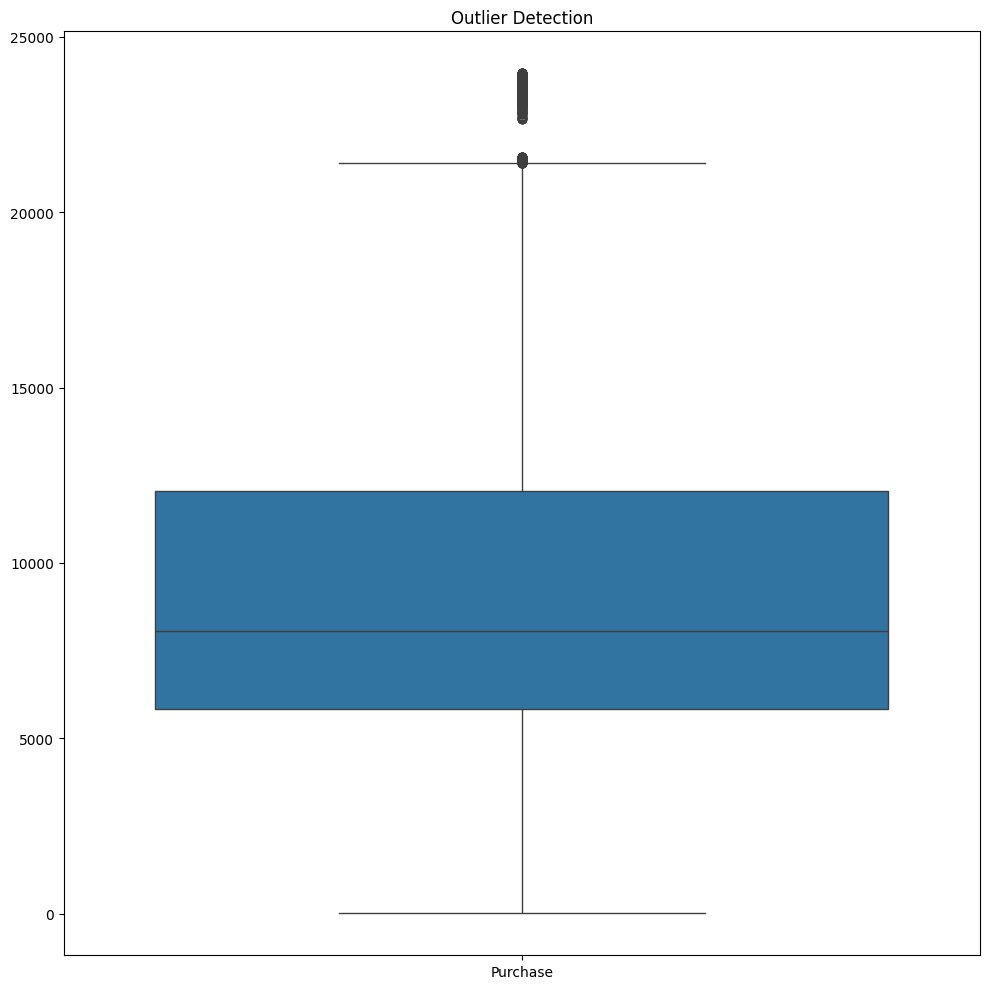

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title('Outlier Detection')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate quartiles and IQR for the specified column
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Outliers in the specified column
upper_outliers_df = df[df['Purchase'] > upper_bound]
lower_outliers_df = df[df['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count

print(f"Upper Outliers Count: {upper_count}")
print(f"Lower Outliers Count: {lower_count}")
print(f"Overall Outliers Count: {total_count}")

Upper Outliers Count: 2677
Lower Outliers Count: 0
Overall Outliers Count: 2677


In [ ]:
outliers_df = df[df['Purchase'] > upper_bound]
outliers_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
filtered_data = df[(df['Purchase'] >= lower_bound) & (df['Purchase'] <= upper_bound)]
filtered_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


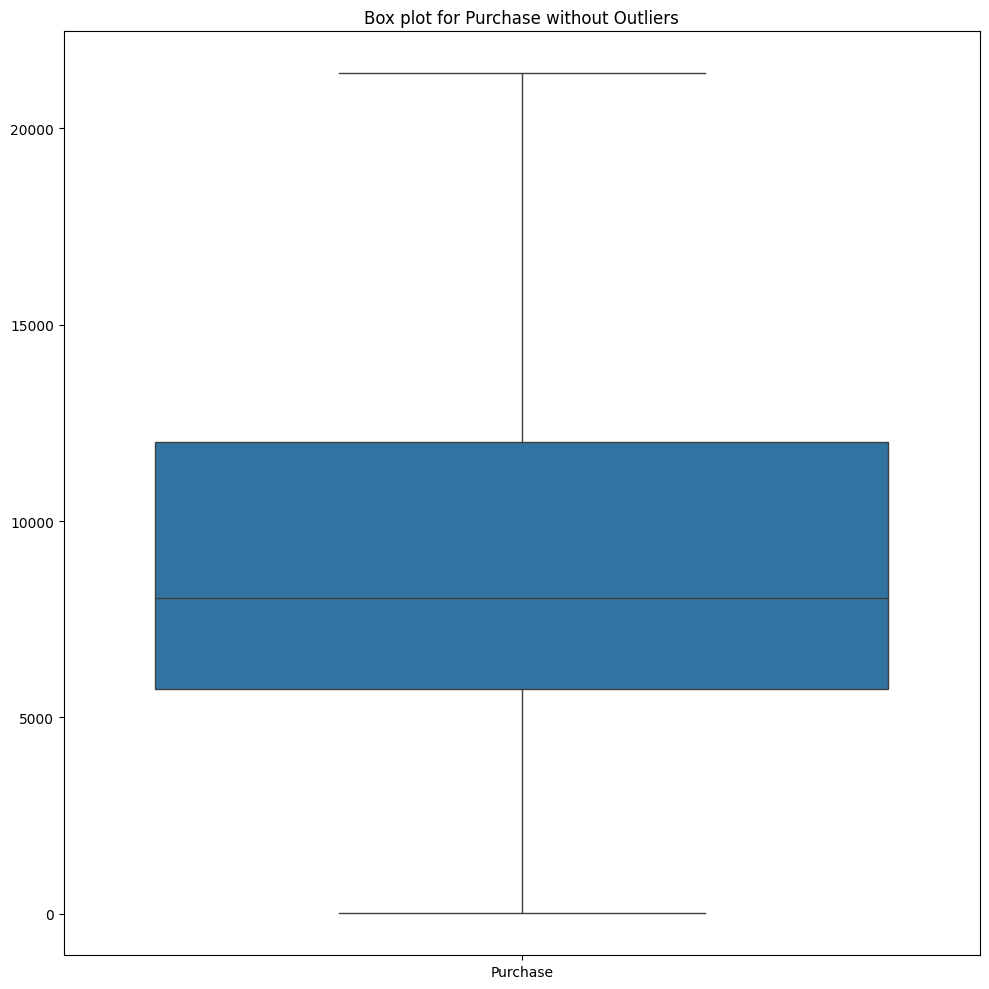

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=filtered_data)
plt.title('Box plot for Purchase without Outliers')
plt.tight_layout()
plt.show()

In [ ]:
## Map numerical values in Marital_status to categorical lables

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


## Univariate Analysis

In [ ]:
category = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']


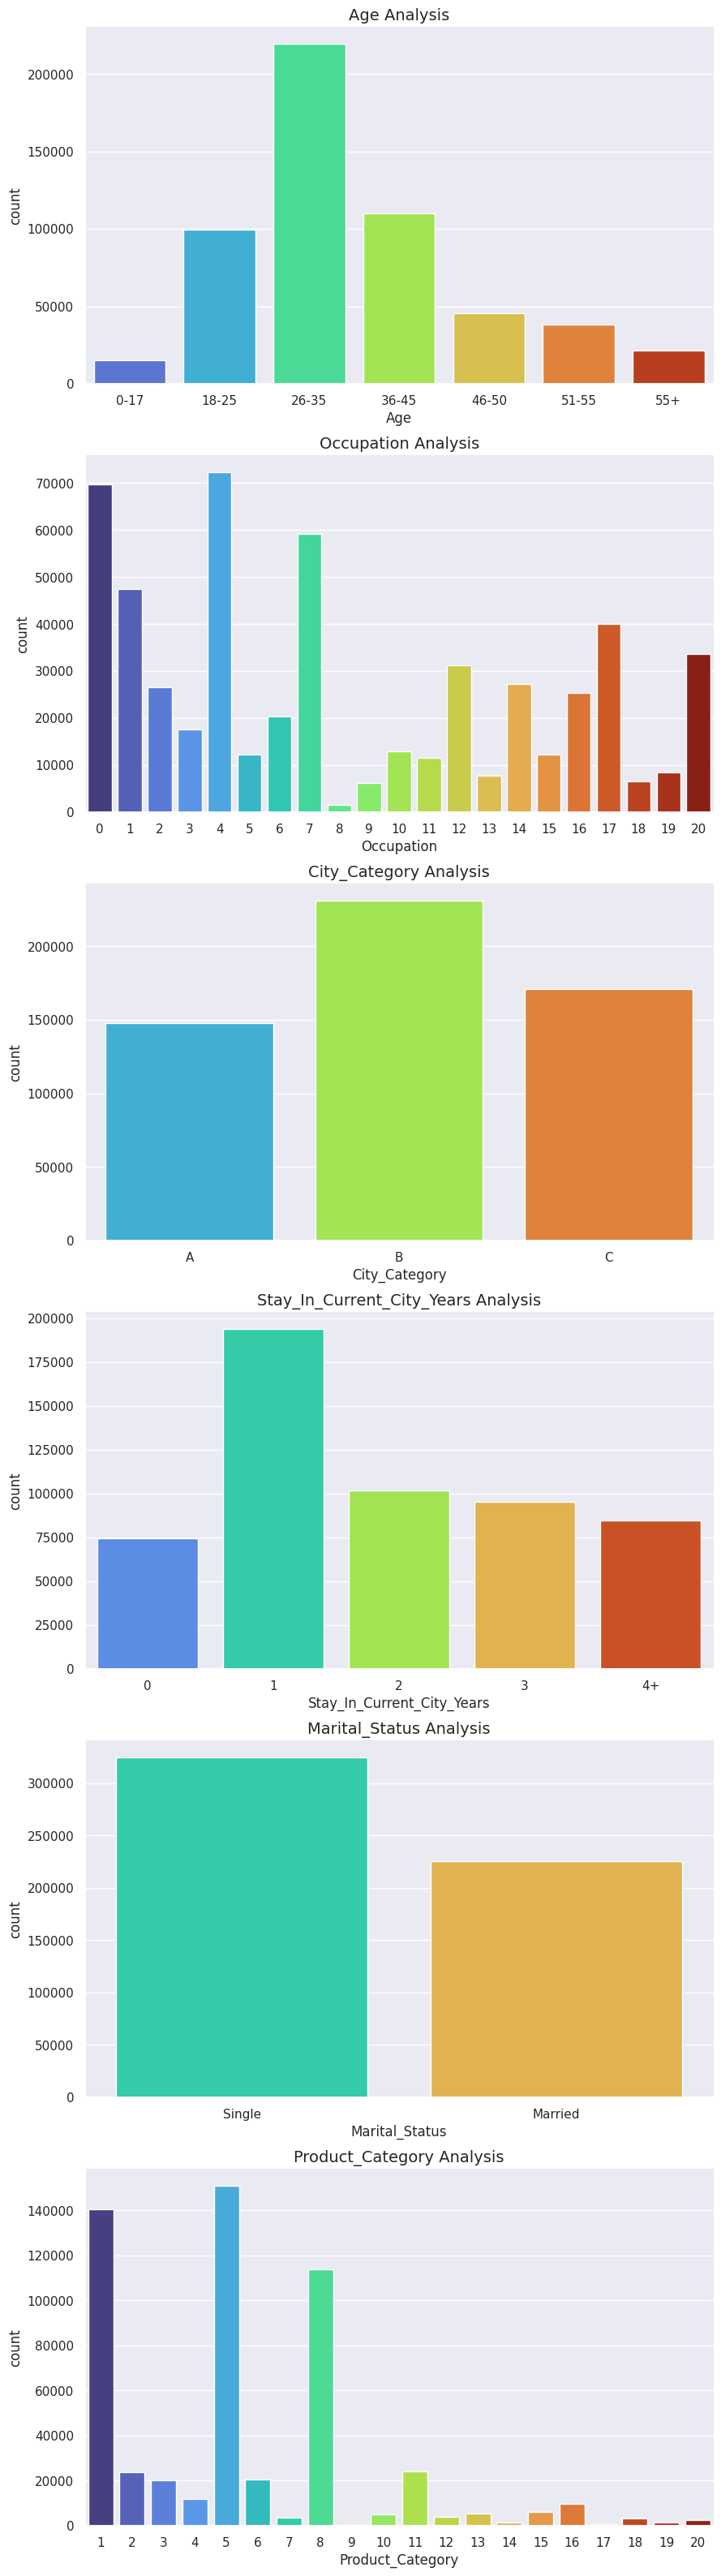

In [ ]:
plt.figure(figsize=(10,40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    sns.countplot(data=df, x=col, hue=col, palette='turbo', legend=False)
    sns.despine()
    plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')

# Show the plot
plt.show()

### **Insights:**

**Age Group Distribution:**

The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.

**Occupation Analysis:**

Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

**City Category Distribution:**

City_Category 'B' has the highest count, indicating that customers from City_Category 'B' have made the most purchases. City_Category 'C' and 'A' follow in terms of count.

**City Residence Duration Impact:**

Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.

**Marital Status Impact:**

Customers with a marital status of 'Single' have a higher count compared to those who are 'Married', suggesting that single individuals make more purchases in the dataset.

**Product Category Purchase Analysis:**

Product categories '1' and '5' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.

## Bivariate Analysis

In [ ]:
pivot = lambda index: df.pivot_table(index=df[index], columns='Gender', aggfunc='size', fill_value=0, observed=False)


In [ ]:
pivot('Age')

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


In [ ]:
pivot('Occupation')

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


In [ ]:
pivot('City_Category')

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


In [ ]:
pivot('Stay_In_Current_City_Years')

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


In [ ]:
pivot('Marital_Status')

Gender,F,M
Marital_Status,,
Single,78821,245910
Married,56988,168349


In [ ]:
pivot('Product_Category')

Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


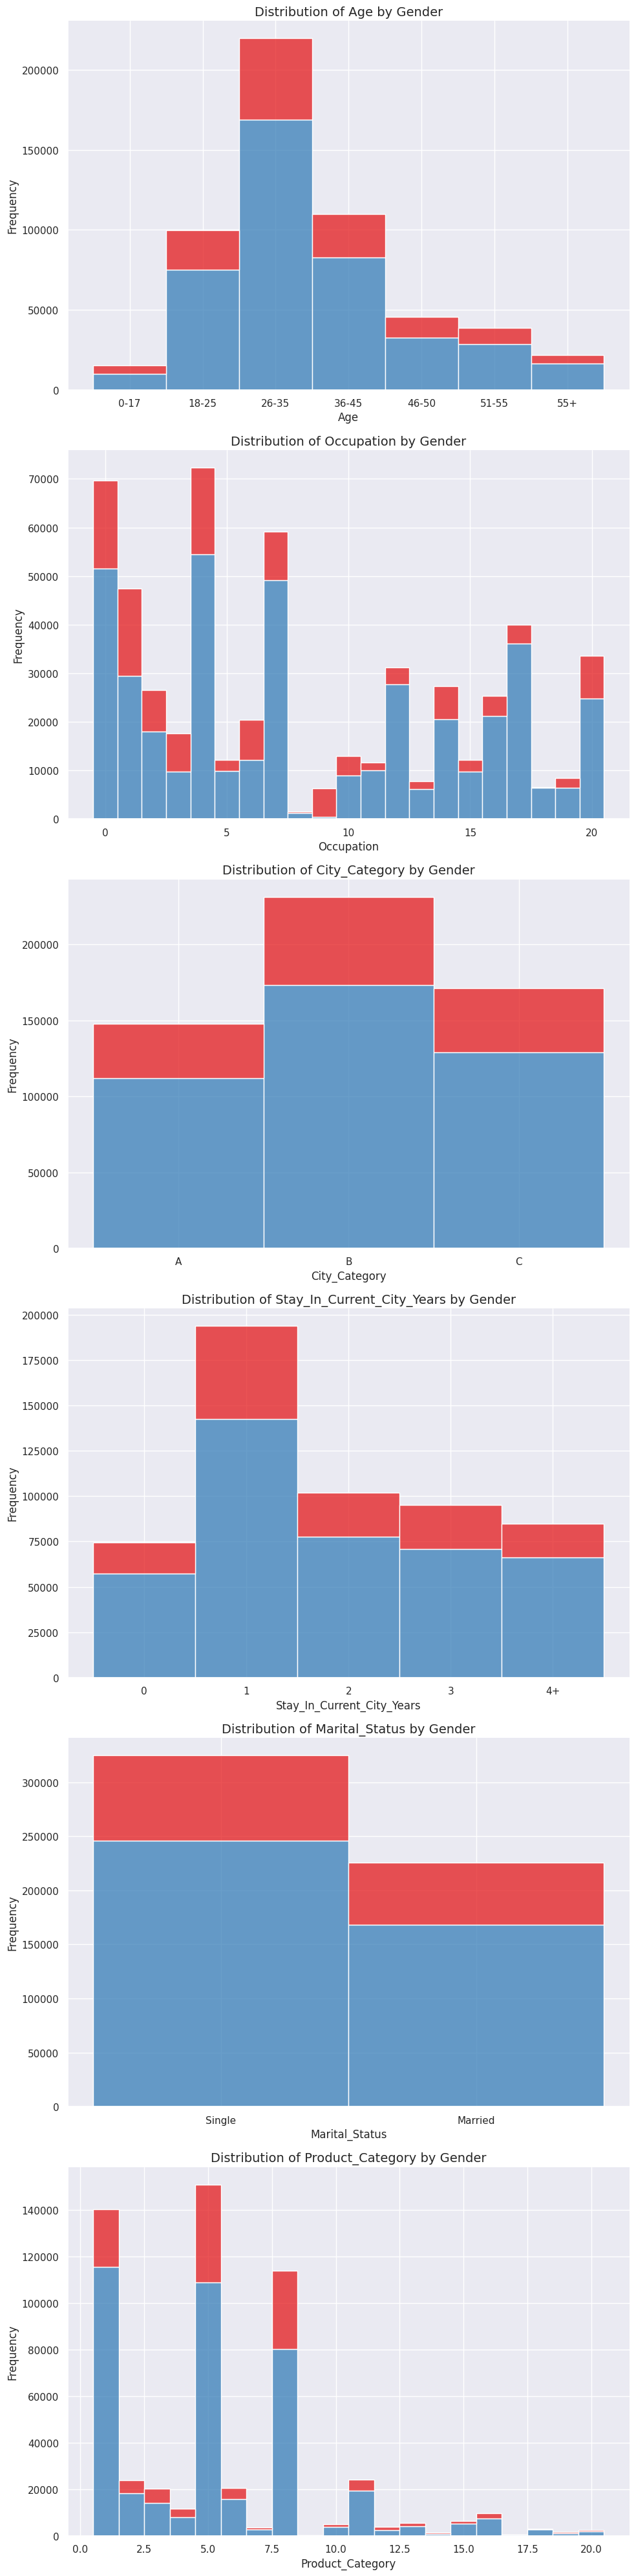

In [ ]:
plt.figure(figsize=(10, 40))
sns.set(style = 'darkgrid')

for i, col in enumerate(category, 1):
  plt.subplot(6, 1, i)
  sns.histplot(data=df, x=col, hue='Gender', palette='Set1', legend=False, multiple='stack')
  sns.despine()

  plt.xlabel(f'{col}', fontsize=12)
  plt.ylabel('Frequency', fontsize=12)
  plt.title(f'Distribution of {col} by Gender', fontsize=14, fontfamily='sans-serif')

  plt.tight_layout()

plt.show()

### Insights:

**Gender-Related Purchase Analysis:**

Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.

**Occupation-Related Purchase Analysis:**

Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.

**City Category-Related Purchase Analysis:**

City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.

**Stay in Current City Duration Impact:**

Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.

**Marital Status-Related Purchase Analysis:**

Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.

**Product Category-Related Purchase Analysis:**

Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.

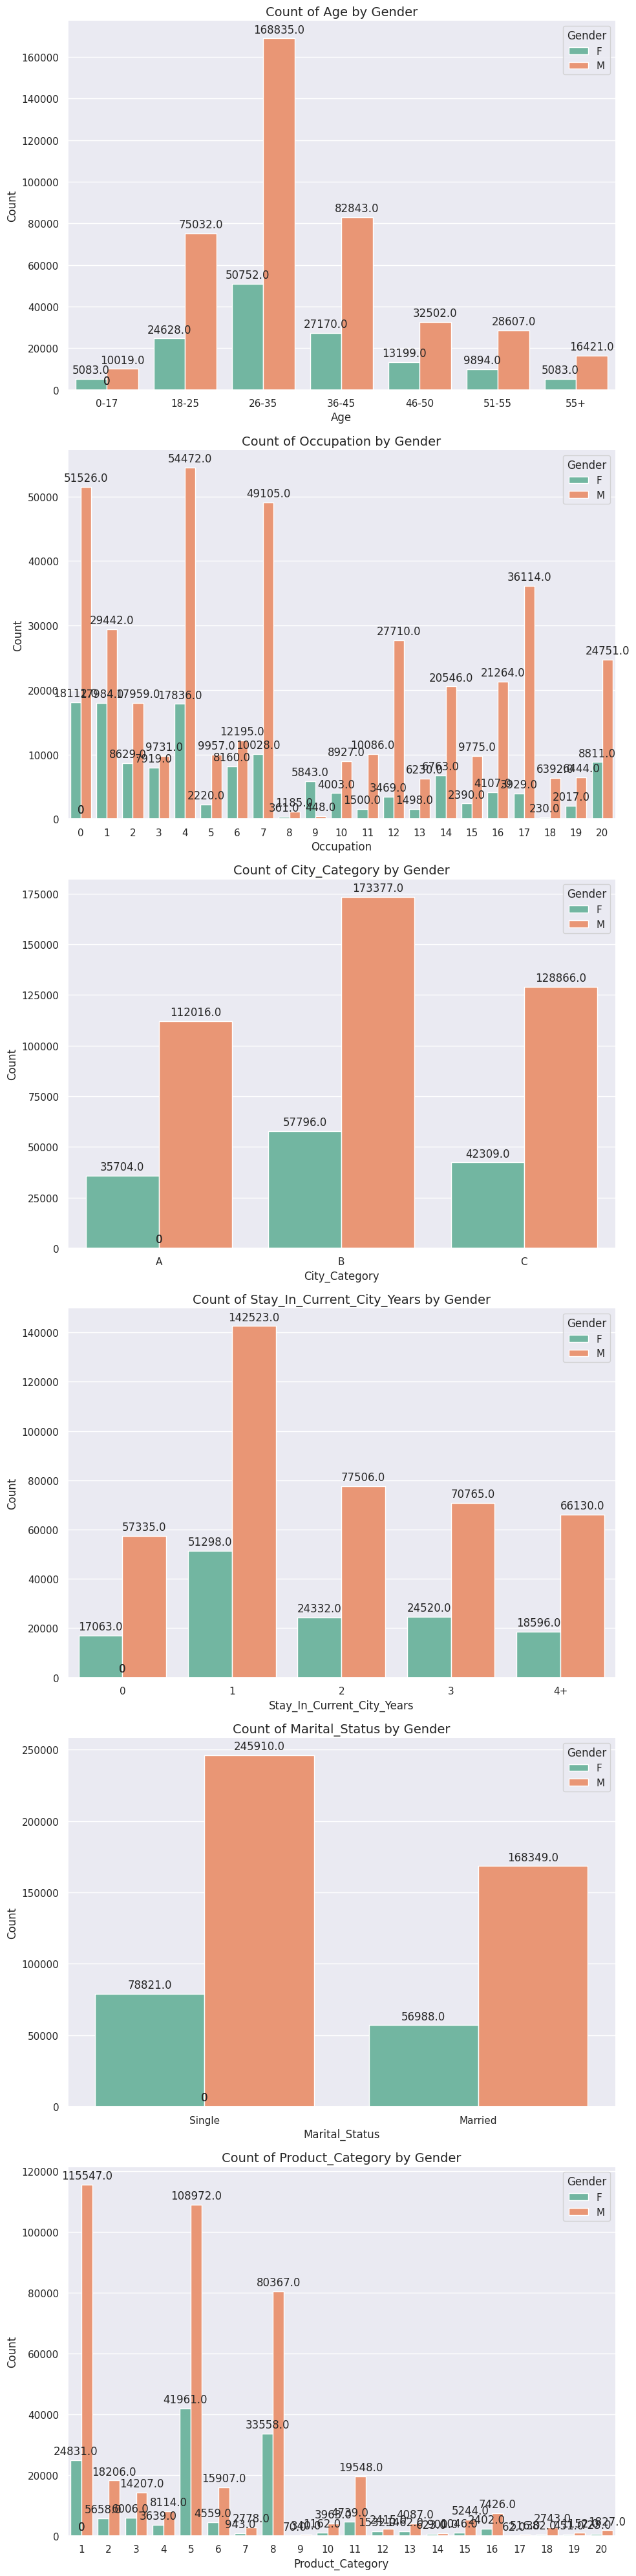

In [ ]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    ax = sns.countplot(data=df, x=col, hue='Gender', palette='Set2')
    sns.despine()

    plt.title(f'Count of {col} by Gender', fontsize=14, fontfamily='sans-serif')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add bar counts as text labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.tight_layout()

plt.show()

## Black Friday Sales Analysis on Gender

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
avg_purchase = df.groupby('Gender')[['Purchase']].mean().reset_index().round(2)
avg_purchase

,Gender,Purchase
0,F,8734.57
1,M,9437.53


In [ ]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

print(f'Male customers - {len(df_male)}')
print(f'Female customers - {len(df_female)}')

Male customers - 414259
Female customers - 135809


In [ ]:
df.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


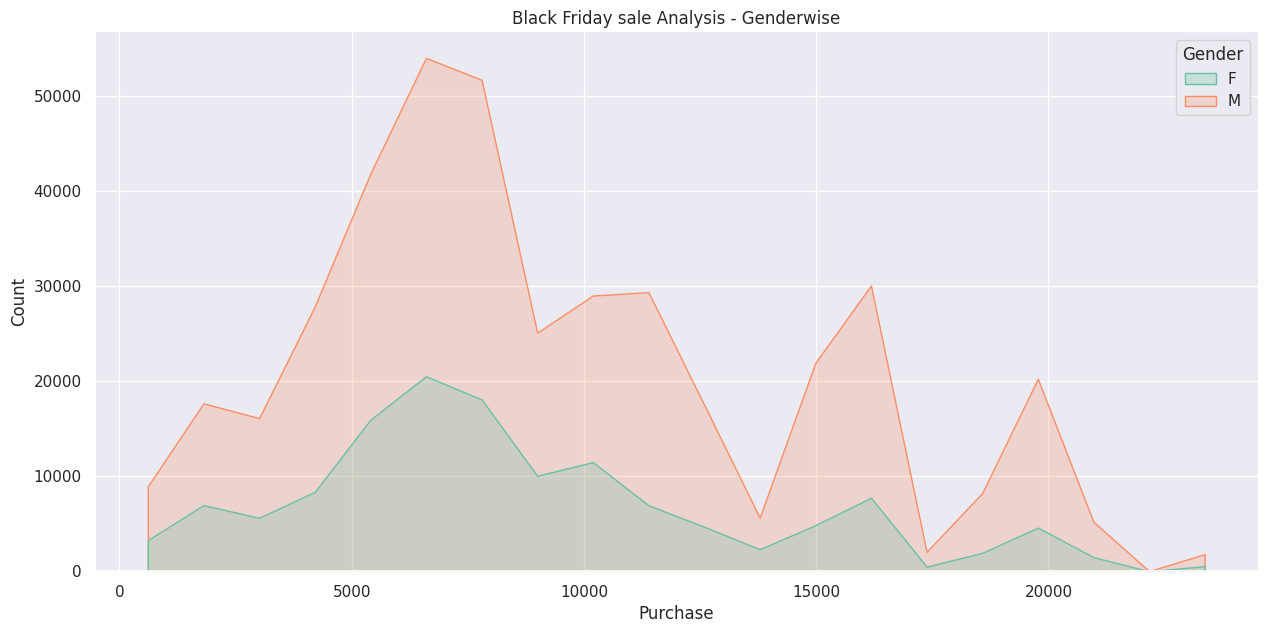

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise')
plt.show()

### Insights:

Men spent more money than women during the Black Friday sale.

* The total number of male customers exceeds the total number of female customers.

* The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

* With a larger male customer base, it is likely that men will make more purchases compared to females.

* The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.

In [ ]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in the dataset.

def data_ci(data, variable, category, confidence_level=0.95):

    category_data = data[data[variable] == category]['Purchase']
    category_mean = category_data.mean()
    category_std = category_data.std()

    # standard error of the mean
    category_sem = category_std / np.sqrt(len(category_data))

    # margin of error
    category_moe = category_sem * norm.ppf((1 + confidence_level) / 2)

    # confidence interval
    category_ci = (category_mean - category_moe, category_mean + category_moe)

    # width
    category_width = category_ci[1] - category_ci[0]

    print(f'{category} 95% confidence interval: {category_ci}')
    print(f'{category} Width: {category_width}')

In [ ]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in a sampled dataset.

def sample_ci(data, variable, category, sample_size):

    category_data = data[data[variable] == category]['Purchase']
    sample_data = category_data.sample(n=sample_size, random_state=42)
    mean_val = sample_data.mean()
    std_dev = sample_data.std()

    # standard error of the mean
    sem = std_dev / np.sqrt(sample_size)

    # margin of error
    moe = sem * norm.ppf((1 + 0.95) / 2)  # 1.96 corresponds to the Z-score for a 95% confidence interval

    # confidence interval
    ci = (mean_val - moe, mean_val + moe)

    category_width = ci[1] - ci[0]

    print(f"\nSample Size: {sample_size}")
    print(f'{category} 95% confidence interval: {ci}')
    print(f'{category} Width: {category_width}')


### Confidence intervals for the Average amount spent per gender.

### 95% confidence interval of Entire *Dataset*

In [ ]:
data_ci(df, 'Gender', 'M')
data_ci(df, 'Gender', 'F')

M 95% confidence interval: (9422.01944736257, 9453.032633581959)
M Width: 31.013186219388444
F 95% confidence interval: (8709.21154714068, 8759.919983170272)
F Width: 50.70843602959212


### 95% confidence interval of 300 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 300)
sample_ci(df, 'Gender', 'F', 300)


Sample Size: 300
M 95% confidence interval: (9283.731565877591, 10491.715100789075)
M Width: 1207.9835349114837

Sample Size: 300
F 95% confidence interval: (8308.865304074718, 9426.034695925284)
F Width: 1117.1693918505662


### 95% confidence interval of 3000 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 3000)
sample_ci(df, 'Gender', 'F', 3000)


Sample Size: 3000
M 95% confidence interval: (9460.10182838994, 9831.170171610062)
M Width: 371.0683432201222

Sample Size: 3000
F 95% confidence interval: (8630.481387808419, 8982.545945524913)
F Width: 352.06455771649416


### 95% confidence interval of 30000 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 30000)
sample_ci(df, 'Gender', 'M', 30000)


Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022

Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


### Insights:

* The confidence interval computed using the entire dataset is wider for males compared to females, indicating higher variability in the amount spent by males.

* The width of the confidence interval is inversely affected by the sample size; as the sample size increases, the interval becomes narrower, providing more precise estimates.

* The confidence intervals for different sample sizes overlap, suggesting that observed differences may not be statistically significant.

* Larger sample sizes result in more normally shaped distributions of means due to the Central Limit Theorem.

### Confidence intervals for the average amount spent per Marital_Status.

### 95% confidence interval of Entire Dataset

In [ ]:
data_ci(df, 'Marital_Status', 'Married')
data_ci(df, 'Marital_Status', 'Single')

Married 95% confidence interval: (9240.460427057078, 9281.888721107669)
Married Width: 41.42829405059092
Single 95% confidence interval: (9248.61641818668, 9283.198819656332)
Single Width: 34.58240146965181


### 95% confidence interval of 300 samples

In [ ]:
sample_ci(df, 'Marital_Status', 'Married', 300)
sample_ci(df, 'Marital_Status', 'Single', 300)


Sample Size: 300
Married 95% confidence interval: (8887.305881933493, 10041.72745139984)
Married Width: 1154.4215694663471

Sample Size: 300
Single 95% confidence interval: (9051.928693931213, 10213.504639402121)
Single Width: 1161.5759454709078


### 95% confidence interval of 3000 samples


In [ ]:
sample_ci(df, 'Marital_Status', 'Married', 3000)
sample_ci(df, 'Marital_Status', 'Single', 3000)


Sample Size: 3000
Married 95% confidence interval: (9118.562018709765, 9482.974647956902)
Married Width: 364.4126292471374

Sample Size: 3000
Single 95% confidence interval: (9246.175079645862, 9612.375587020804)
Single Width: 366.2005073749424


### 95% confidence interval of 30000 samples

In [ ]:
sample_ci(df, 'Marital_Status', 'Married', 30000)
sample_ci(df, 'Marital_Status', 'Single', 30000)


Sample Size: 30000
Married 95% confidence interval: (9198.15616601518, 9312.029900651485)
Married Width: 113.87373463630502

Sample Size: 30000
Single 95% confidence interval: (9229.816006946752, 9343.573126386582)
Single Width: 113.7571194398297


### Insights:

* The confidence interval for the 'Married' group is wider than that for the 'Single' group, indicating higher variability in the amount spent for married individuals.

* The width of the confidence interval decreases as the sample size increases, showcasing the impact of larger sample sizes on precision.

* Yes, the confidence intervals for 'Married' and 'Single' groups overlap, suggesting that observed differences may not be statistically significant across sample sizes.

* As the sample size increases, the width of the confidence interval decreases, leading to a more precise estimate of the mean and resulting in a more normal distribution of sample means.

### Confidence intervals for the average amount spent per Marital_Status

### 95% confidence interval of Entire Dataset

In [ ]:
data_ci(df, 'Age', '0-17')
data_ci(df, 'Age', '18-25')
data_ci(df, 'Age', '26-35')
data_ci(df, 'Age', '36-45')
data_ci(df, 'Age', '46-50')
data_ci(df, 'Age', '55+')

0-17 95% confidence interval: (8851.947970542686, 9014.981310347262)
0-17 Width: 163.03333980457683
18-25 95% confidence interval: (9138.407948753442, 9200.919263769136)
18-25 Width: 62.51131501569398
26-35 95% confidence interval: (9231.73367640003, 9273.647589339746)
26-35 Width: 41.913912939715374
36-45 95% confidence interval: (9301.669410965314, 9361.031978870433)
36-45 Width: 59.36256790511834
46-50 95% confidence interval: (9163.085142648752, 9254.166252287903)
46-50 Width: 91.08110963915169
55+ 95% confidence interval: (9269.29883441773, 9403.262084481079)
55+ Width: 133.96325006334882


### 95% confidence interval of 300 samples

In [ ]:
sample_ci(df, 'Age', '0-17',300)
sample_ci(df, 'Age', '18-25',300)
sample_ci(df, 'Age', '26-35',300)
sample_ci(df, 'Age', '36-45',300)
sample_ci(df, 'Age', '46-50',300)
sample_ci(df, 'Age', '55+',300)


Sample Size: 300
0-17 95% confidence interval: (8042.115409806883, 9195.43792352645)
0-17 Width: 1153.3225137195668

Sample Size: 300
18-25 95% confidence interval: (8841.832523352577, 9998.79414331409)
18-25 Width: 1156.961619961512

Sample Size: 300
26-35 95% confidence interval: (8371.065497628038, 9519.247835705293)
26-35 Width: 1148.1823380772548

Sample Size: 300
36-45 95% confidence interval: (9058.511768661903, 10168.321564671429)
36-45 Width: 1109.8097960095256

Sample Size: 300
46-50 95% confidence interval: (8791.503247273875, 9927.150086059457)
46-50 Width: 1135.646838785582

Sample Size: 300
55+ 95% confidence interval: (8666.663992004576, 9849.616007995422)
55+ Width: 1182.9520159908461


### 95% confidence interval of 3000 samples

In [ ]:
sample_ci(df, 'Age', '0-17',3000)
sample_ci(df, 'Age', '18-25',3000)
sample_ci(df, 'Age', '26-35',3000)
sample_ci(df, 'Age', '36-45',3000)
sample_ci(df, 'Age', '46-50',3000)
sample_ci(df, 'Age', '55+',3000)


Sample Size: 3000
0-17 95% confidence interval: (8687.664588770689, 9055.084744562644)
0-17 Width: 367.42015579195504

Sample Size: 3000
18-25 95% confidence interval: (9001.345443138514, 9364.180556861487)
18-25 Width: 362.8351137229729

Sample Size: 3000
26-35 95% confidence interval: (9110.626934190286, 9470.271065809715)
26-35 Width: 359.64413161942866

Sample Size: 3000
36-45 95% confidence interval: (9253.797851839656, 9615.063481493678)
36-45 Width: 361.26562965402263

Sample Size: 3000
46-50 95% confidence interval: (9029.905975457834, 9385.392691208832)
46-50 Width: 355.486715750998

Sample Size: 3000
55+ 95% confidence interval: (9184.95957145098, 9549.377761882353)
55+ Width: 364.41819043137366


### Insights

* The 26-35 group shows the narrowest confidence interval, indicating consistent spending.

* Wider confidence intervals among both younger (0-17) and older (55+) groups suggest these age groups might exhibit less predictable spending patterns, possibly due to varying income levels or spending priorities.

* The decreasing width of the confidence interval with middle age groups highlights the impact of sample size and spending consistency on precision, as larger sample sizes lead to narrower intervals and, therefore, more reliable mean estimates.

* This pattern underscores that a larger and more stable sample size contributes to more accurate confidence intervals, reflecting a narrower range of likely spending behaviors around the mean.


## Recommendations:

1. Target Male Shoppers:

  Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

2. Focus on 26 - 45 Age Group:

  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

3. Engage Younger Shoppers:

  Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

4. Customer Segmentation:

  Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

5. Enhance the 51 - 55 Age Group Shopping Experience:

  Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.